## The Sparks Foundations: Task 1, March 2021 for Data Science and Business Analytics
### Intern Name: Ashish Joshi

#### -- Predicting percentage of a student based on number of hours studied
#### -- data: http://bit.ly/w-data
#### -- predict the percentage when student studies for 9.5hrs/day
#### -- github profile: https://github.com/ashishjoshi6921



#### The score is predicted usng two libraries: statmodels and sklearn to demonstarte the methods of using both libraries

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors


## Load the dataset and assigning to the data variable

In [3]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

## Visualising the dataset

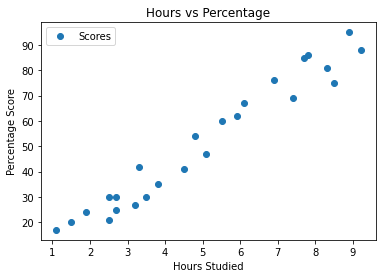

In [5]:
data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### - it is seen that there exists some linear relationship between the variables
### - Let's find out the pearson correlation of the distribution

## Finding out the pearson correlation 

In [6]:
from scipy.stats import pearsonr

In [7]:
list1 = data['Hours'] 
list2 = data['Scores'] 
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.976


* the variables have a very strong positive correlation, which means, as the number of study hours increase, 
  so does the score increase


### Equation of linear regression
* 𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 
##### 𝑦  is the variable that we want to predict (dependent variable)
##### 𝑐  is the intercept
##### 𝑚1  is the coefficient for the first independent variable
##### 𝑚𝑛  is the coefficient for the nth independent variable
In our case:

#### 𝑦=𝑐+𝑚1×hours
**The  𝑚  values are called the model coefficients or model parameters.

In [8]:
### Extracting the variables from the data set and assigning them to X and y
X = data['Hours'] 
y = data['Scores']

## Test - Train split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
# Let's now take a look at the train dataset

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [11]:
X_train.shape ## this is reshaped in the next part to get in the (17,1) so that the model doesn not throw an error

(17,)

In [12]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

### *** Usting the statmodel library

In [13]:
import statsmodels.api as sm 

In [14]:
# Add a constant to get an intercept since statmodels library does not include the intercept
# and therefore the statmodels will think the constant is actually a predictor variaable and the coefficient of this will be 
# the intercept

X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()


In [15]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [16]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.15e-11
Time:                        13:14:06   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

* the r -squared is 0.957 (which is very good r square)
* the coefficient is 9.8717 and intercept is 1.4951

In [17]:
## therefore
## y_pred = 1.4951 + 9.8717*X_train

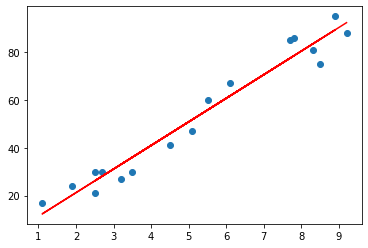

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.8717*X_train, 'r')
plt.show()

In [19]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [20]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [46]:
hours = {'const':[1],
         'Hours':[9.5]
        }

In [47]:
hours_df = pd.DataFrame(hours, columns = ['const','Hours'])


In [48]:
hours_df

,const,Hours
0,1,9.5


In [49]:
own =lr.predict(hours_df)
own
print ('The predicted score is: {}'.format(own[0]))

The predicted score is: 95.27642918067828


### *** Using SKlearn

In [26]:
## steps in model building

# 1. Create an object of linear regression
# 2. Fit the model
# 3. see the parameters, make predictions using train test split
# 4. evaluate the model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# reshape X_train to 17,1

X_train_lm = X_train.values.reshape(-1,1)
X_train_lm.shape

(17, 1)

In [29]:
X_test_lm=X_test.values.reshape(-1,1)
X_test_lm.shape

(8, 1)

In [30]:
# 1. Create an object of linear regression

lm = LinearRegression()

# 2. Fit the model

lm.fit(X_train_lm, y_train)

LinearRegression()

In [31]:
# 3. see the parameters, make predictions using train test split
print(lm.coef_)
print(lm.intercept_)



[9.87171443]
1.495142109236383


In [32]:
# Predicting on the test set

y_test_pred = lm.predict(X_test_lm)

In [33]:
X_test_lm

array([[2.7],
       [3.8],
       [3.3],
       [5.9],
       [1.5],
       [7.4],
       [6.9],
       [4.8]])

In [34]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df2 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [35]:
print(X_test)

9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
19    7.4
23    6.9
21    4.8
Name: Hours, dtype: float64


In [36]:
hours_2 = {
         'Hours':[9.5]
        }
hours_2_df = pd.DataFrame(hours_2, columns = ['Hours'])
hours_2_df

,Hours
0,9.5


In [37]:
own = lm.predict(hours_2_df)

In [38]:
own
print ('The predicted score is: {}'.format(own[0]))

The predicted score is: 95.27642918067825


In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred)) 

Mean Absolute Error: 4.762517892332275


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9309458862687437

* the r squared is 0.93 which is a very strong r squared
* the coefficient is 9.8717 and the intercept is 1.4951

### Conclusion:

* in both the methods, the coefficient and the intercepts are more or less the same values.
* there is a slight difference in the r sqaured value
* 0 r squared indicates that the model does not explain and variability in the data while 1 indicates that the model explains all the variability in the data
* r squared closer to 1 indicates good model
* if the student studies for 9.5 hrs, the score that the algorithm predicts is 95.27 % with a confidence interval of (8.7917,10.9517) at the 95 % confidence level that contains the true value of the coefficient of the number of hours studied
* Since 0 does not lie within the confidence interval, the results are statistically significant